In [47]:
%matplotlib inline
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
cwd = os.getcwd()
sys.path.append(os.path.join(cwd, '..'))
from sklearn.externals import joblib
from aye.preprocessing import rotate_image
from aye.blob_analysis import region_props, num_local_maximas
from aye.fruit_detector import FruitDetector
from aye.bounding_box import extract_bbox
from aye.visualization import *

In [48]:
# Load classifier and scaler
clf = joblib.load('../model/svc.pkl')
scaler = joblib.load('../model/scaler.pkl')
detector = FruitDetector(clf, scaler)

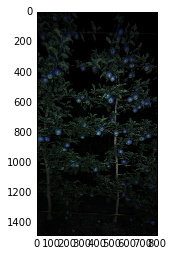

In [49]:
im_dir = os.path.join(cwd, 'images')
im = cv2.imread(os.path.join(im_dir, 'frame0005.jpg'))
im = im[200:1000, :1480, :]
im = rotate_image(im)

fig = plt.figure()
plt.imshow(im)

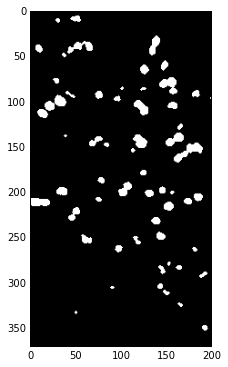

In [50]:
s, bw = detector.detect(im)
blobs, bw = region_props(bw)
fig = plt.figure(figsize=(8,6))
plt.imshow(bw, cmap=plt.cm.gray)

blobs = blobs[blobs['area'] >= 25]

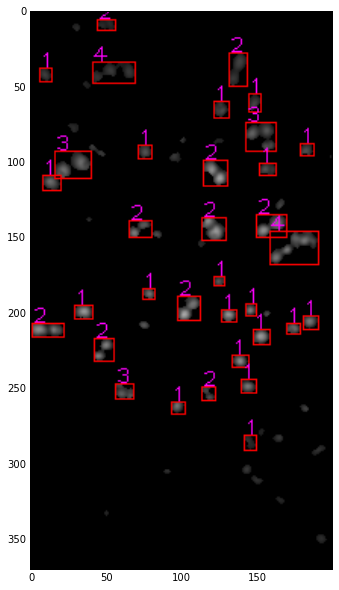

In [51]:
v = s.im_hsv[:, :, -1]
bw = bw > 0
v[~bw] = 0

disp = cv2.cvtColor(v, cv2.COLOR_GRAY2BGR)
draw_bboxes(disp, blobs['bbox'], color=(255, 0, 0))
for blob in blobs:
    bbox = blob['bbox']
    region = extract_bbox(v, blob['bbox'])
    x, y, w, h = bbox
    n = num_local_maximas(region)
    cv2.putText(disp, str(n), (x, y), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 255), 1)

fig = plt.figure(figsize=(10,10))
plt.imshow(disp)